In [1]:
file = 'social-ads-raw.xlsx'

**segment**: segment/market ID  
**google**, **facebook**, **instagram**: amount spent on respective platform ($ '000)  
**sales**: units ('000) of product  
**size**: market size  
**area**: market type

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel(file, usecols="A:G")
df.sample(10)

,segment,google,facebook,instagram,sales,size,area
155,156,4.1,11.6,5.7,3.2,large,suburban
183,184,287.6,43.0,71.8,26.2,small,urban
103,104,187.9,17.2,17.9,14.7,small,rural
39,40,228.0,37.7,32.0,21.5,large,rural
138,139,43.0,25.9,20.5,9.6,large,urban
121,122,18.8,21.7,50.4,7.0,large,urban
56,57,7.3,28.1,41.4,5.5,small,urban
190,191,39.5,41.1,5.8,10.8,large,suburban
187,188,191.1,28.7,18.2,17.3,large,rural
76,77,27.5,1.6,20.7,6.9,small,urban


In [4]:
df.shape

(200, 7)

OSEMN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   segment    200 non-null    int64  
 1   google     200 non-null    float64
 2   facebook   200 non-null    float64
 3   instagram  200 non-null    float64
 4   sales      200 non-null    float64
 5   size       200 non-null    object 
 6   area       200 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 11.1+ KB


In [6]:
df.describe(include = "all")

,segment,google,facebook,instagram,sales,size,area
count,200.000000,200.000000,200.000000,200.000000,200.000000,200,200
unique,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,large,suburban
freq,NaN,NaN,NaN,NaN,NaN,108,78
mean,100.500000,147.042500,23.264000,30.554000,14.022500,NaN,NaN
std,57.879185,85.854236,14.846809,21.778621,5.217457,NaN,NaN
min,1.000000,0.700000,0.000000,0.300000,1.600000,NaN,NaN
25%,50.750000,74.375000,9.975000,12.750000,10.375000,NaN,NaN
50%,100.500000,149.750000,22.900000,25.750000,12.900000,NaN,NaN
75%,150.250000,218.825000,36.525000,45.100000,17.400000,NaN,NaN


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='count', ylabel='area'>

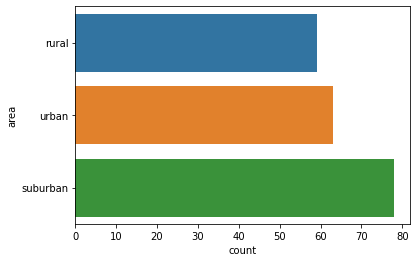

In [8]:
sns.countplot(y = df["area"])

<AxesSubplot:xlabel='instagram', ylabel='sales'>

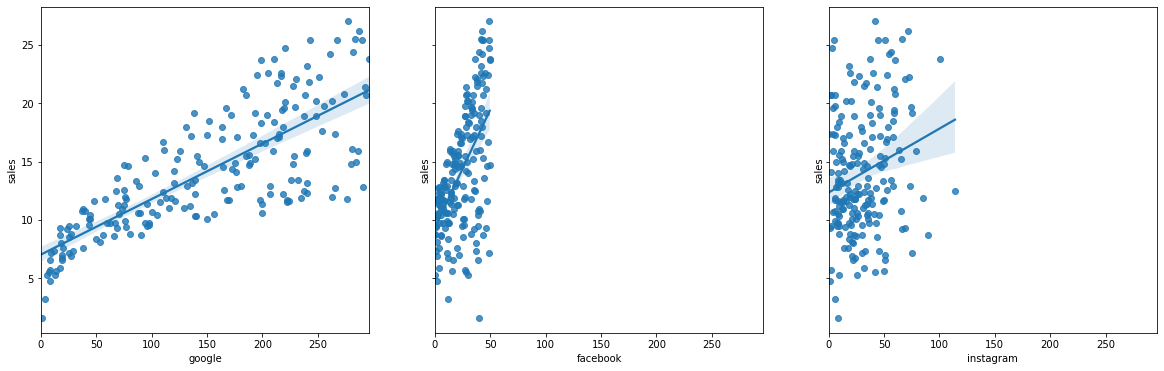

In [9]:
#platforms = ['google', 'facebook', 'instagram']

fig, ax = plt.subplots(1, 3, figsize = (20, 6), sharey = True, sharex = True)

sns.regplot(data = df, x = 'google', y = 'sales', ax = ax[0])
sns.regplot(data = df, x = 'facebook', y = 'sales', ax = ax[1])
sns.regplot(data = df, x = 'instagram', y = 'sales', ax = ax[2])

In [10]:
#change wide to long data
#to plot scatter plot
df_long = df.melt(id_vars = ['segment', 'sales', 'size', 'area'],
                  value_vars = ['google', 'facebook', 'instagram'], var_name = 'platform', value_name = 'expenses')

<AxesSubplot:xlabel='expenses', ylabel='sales'>

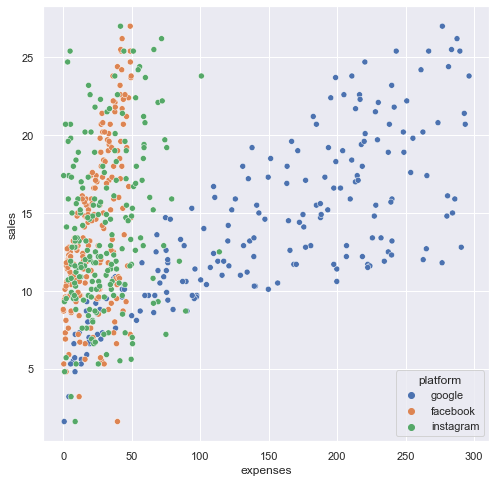

In [11]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.scatterplot(data = df_long, x = 'expenses', y = 'sales', hue = 'platform')

<AxesSubplot:xlabel='expenses', ylabel='sales'>

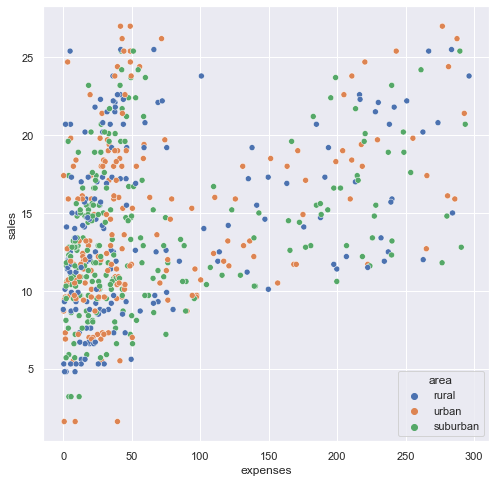

In [12]:
sns.scatterplot(data = df_long, x = 'expenses', y = 'sales', hue = 'area')

<AxesSubplot:xlabel='expenses', ylabel='sales'>

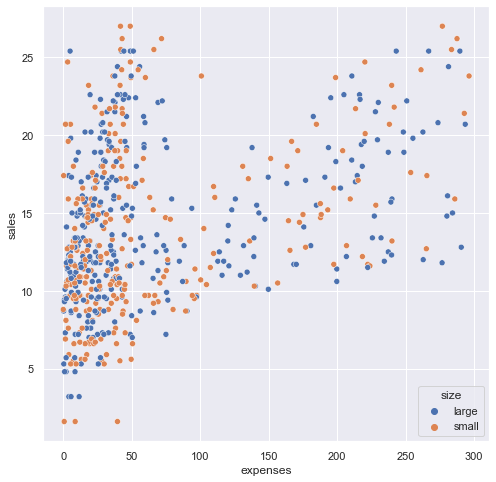

In [13]:
sns.scatterplot(data = df_long, x = 'expenses', y = 'sales', hue = 'size')

<AxesSubplot:xlabel='size', ylabel='sales'>

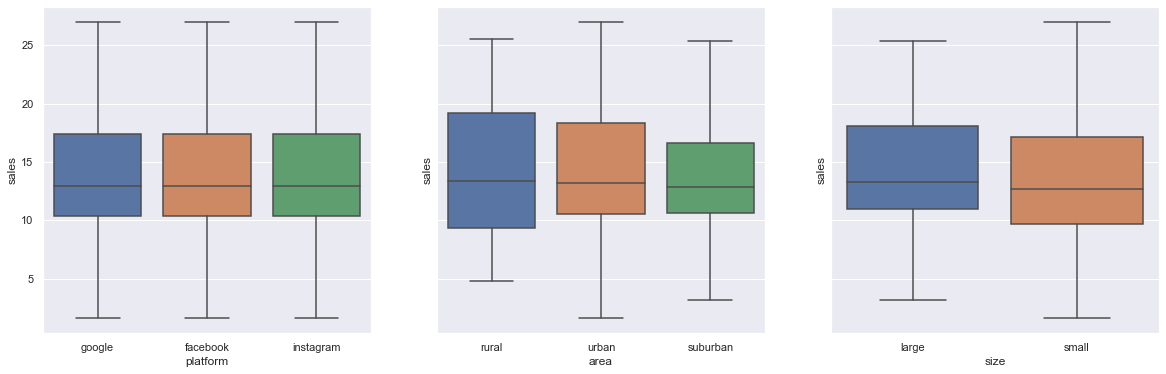

In [14]:
fig, ax = plt.subplots(1, 3, figsize = (20, 6), sharey = True)

sns.boxplot(data = df_long, x = 'platform', y = 'sales', ax = ax[0])
sns.boxplot(data = df_long, x = 'area', y = 'sales', ax = ax[1])
sns.boxplot(data = df_long, x = 'size', y = 'sales', ax = ax[2])

<AxesSubplot:xlabel='size', ylabel='expenses'>

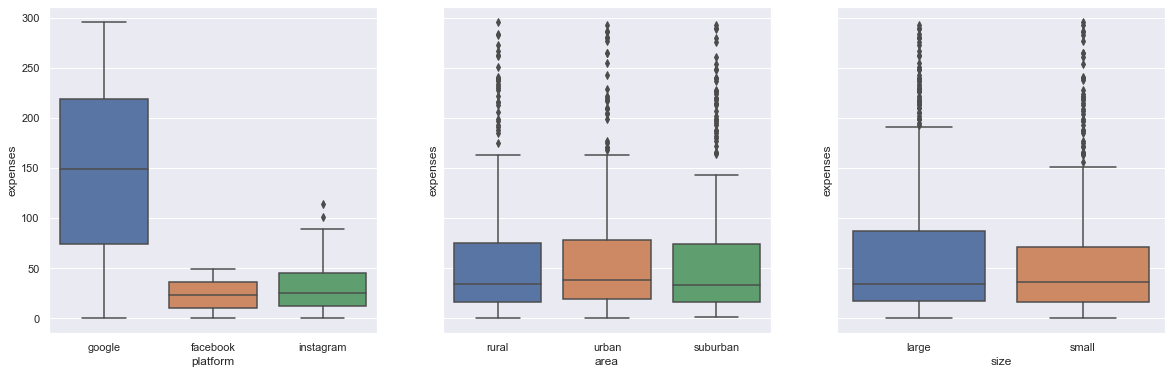

In [15]:
fig, ax = plt.subplots(1, 3, figsize = (20, 6), sharey = True)

sns.boxplot(data = df_long, x = 'platform', y = 'expenses', ax = ax[0])
sns.boxplot(data = df_long, x = 'area', y = 'expenses', ax = ax[1])
sns.boxplot(data = df_long, x = 'size', y = 'expenses', ax = ax[2])

In [16]:
df = df.drop(['segment'], axis = 1)
df.head()

,google,facebook,instagram,sales,size,area
0,230.1,37.8,69.2,22.1,large,rural
1,44.5,39.3,45.1,10.4,small,urban
2,17.2,45.9,69.3,9.3,small,rural
3,151.5,41.3,58.5,18.5,small,urban
4,180.8,10.8,58.4,12.9,large,suburban


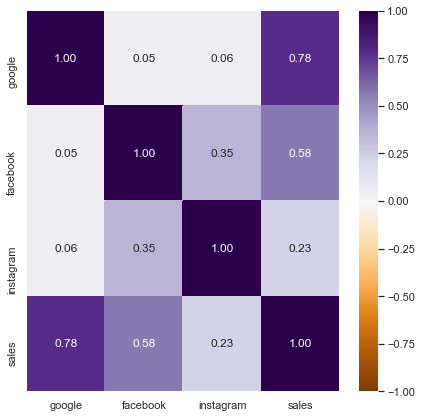

In [17]:
sns.set(rc = {"figure.figsize": (7,7)})
sns.heatmap(df.corr('pearson'), cmap = 'PuOr', fmt = '.2f', annot = True, vmin = -1, vmax = 1, center = 0);

In [18]:
df['size'] = df['size'].map({"large": 1, "small": 0})
size_dum = pd.get_dummies(df['size'])

area_dum = pd.get_dummies(df['area'])
df = df.drop(['area'], axis = 1).join(area_dum)

df.head()

,google,facebook,instagram,sales,size,rural,suburban,urban
0,230.1,37.8,69.2,22.1,1,1,0,0
1,44.5,39.3,45.1,10.4,0,0,0,1
2,17.2,45.9,69.3,9.3,0,1,0,0
3,151.5,41.3,58.5,18.5,0,0,0,1
4,180.8,10.8,58.4,12.9,1,0,1,0


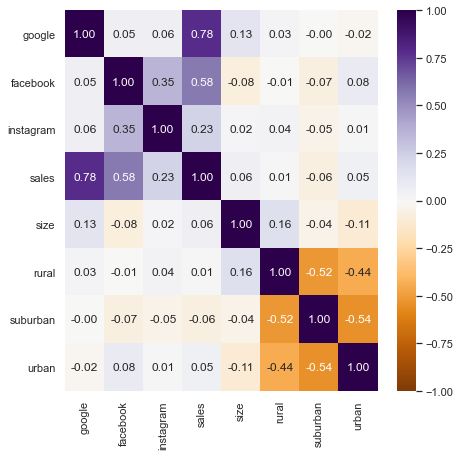

In [19]:
sns.set(rc = {"figure.figsize": (7,7)})
sns.heatmap(df.corr('pearson'), cmap = 'PuOr', fmt = '.2f', annot = True, vmin = -1, vmax = 1, center = 0);

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
y = df ['sales']
X = df.drop(['sales'], axis = 1)

In [22]:
model.fit(X,y)

LinearRegression()

In [23]:
#R-square
model.score(X, y)

0.8981611875394304

In [24]:
print(f"Intercept = {model.intercept_}")
print(f"Coefficients = {model.coef_}")
#Coefficients = google, facebook, instagram, size, rural, suburban, urban

Intercept = 2.9280493329187873
Coefficients = [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.05385834 -0.16042133
  0.21427968]


#If ads budget are 100k (70, 20, 10)
y=model.predict([[50, 30, 20, 1, 0, 0, 1]])
print(y)